In [3]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

 Running CH4 Pyrolysis for All Mechanisms

🔧 Running mechanism: GRI-Mech 3.0  (gri30.yaml)
   ✅ SUCCESS: GRI-Mech 3.0 completed

🔧 Running mechanism: USC Mech II  (USCII.yaml)
   ✅ SUCCESS: USC Mech II completed

🔧 Running mechanism: ABF Soot Mechanism  (abf.yaml)
   ✅ SUCCESS: ABF Soot Mechanism completed

🔧 Running mechanism: Cai-Pitsch  (cai_pisch.yaml)
   ✅ SUCCESS: Cai-Pitsch completed


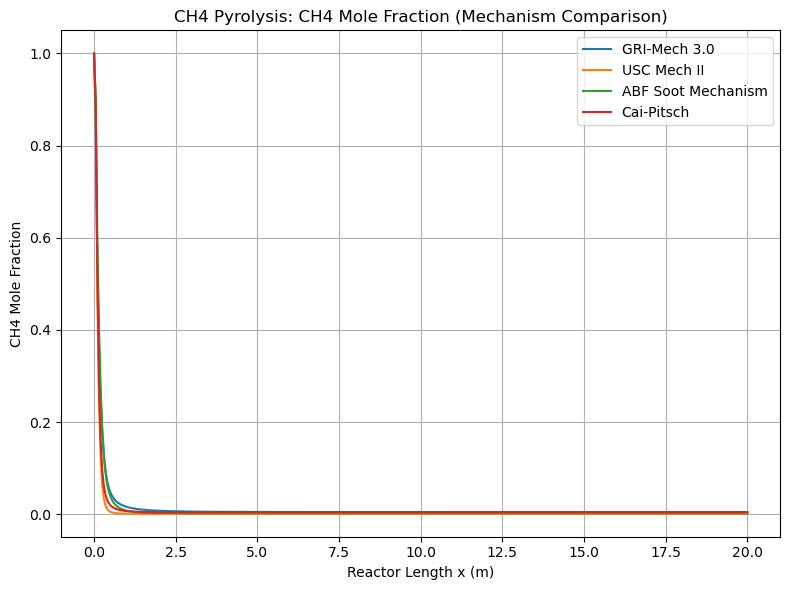

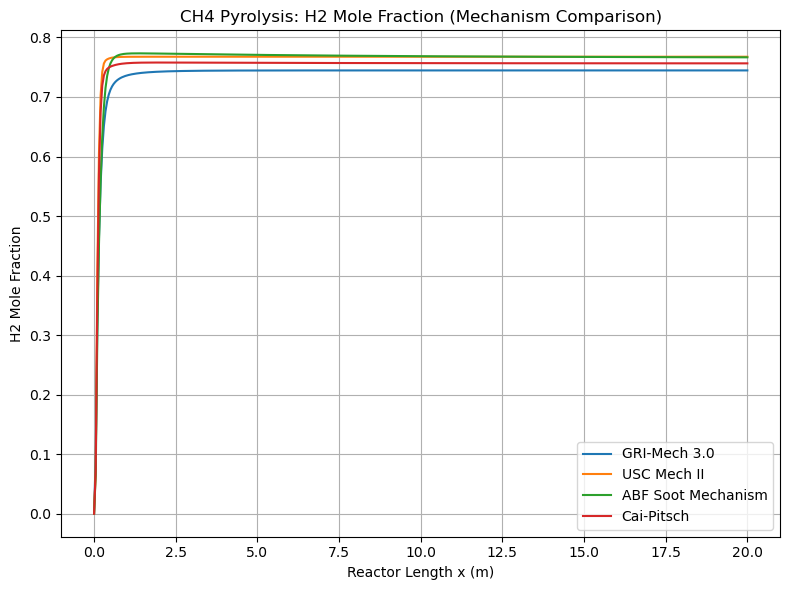

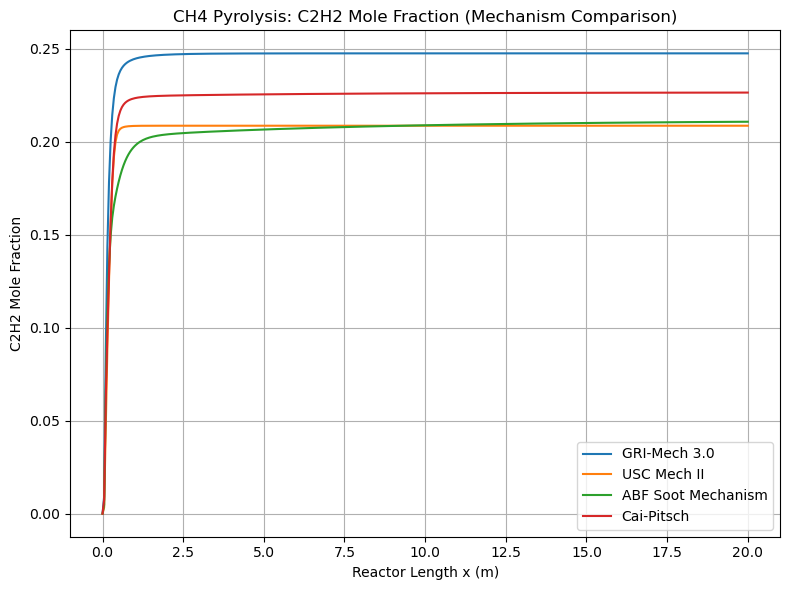

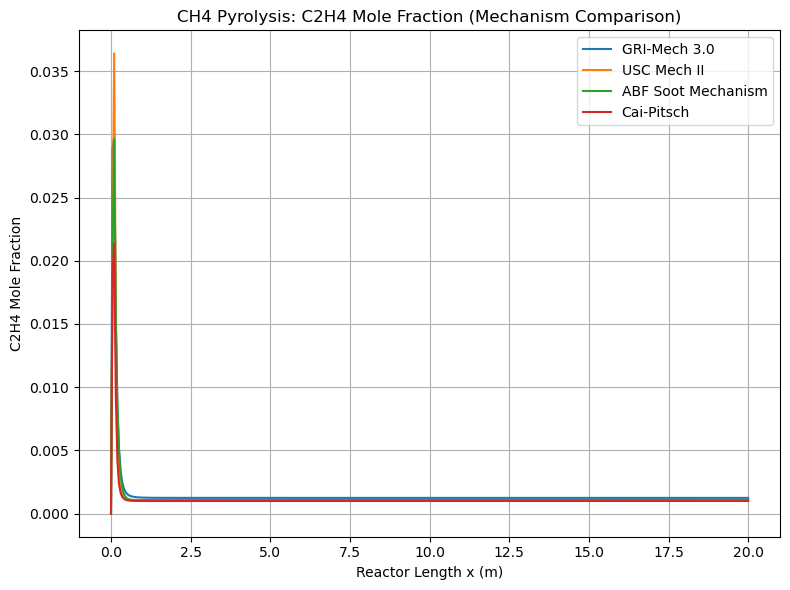

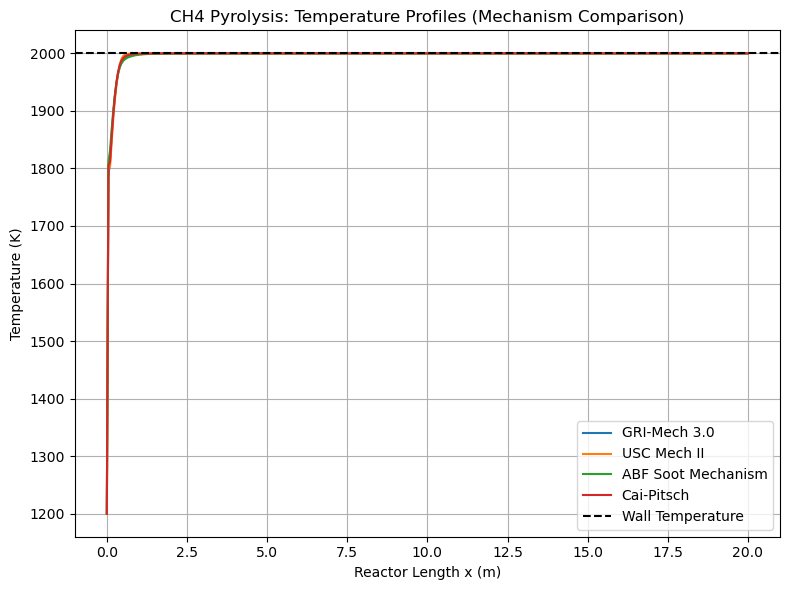

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cantera as ct

# Import your unified solver file (Project_3_3.py must be in the same directory)
from Project_3_3 import solve_pfr_pyrolysis


# =============================================================================
# 1. Mechanism List (YAML files must exist)
# =============================================================================
mechanisms = {
    "GRI-Mech 3.0":       "gri30.yaml",
    "USC Mech II":        "USCII.yaml",
    "ABF Soot Mechanism": "abf.yaml",
    "Cai-Pitsch":         "cai_pisch.yaml"   # You said the file name is correct now
}


# =============================================================================
# 2. Reactor Operating Conditions
# =============================================================================
D       = 0.05        # tube diameter [m]
u0      = 0.05        # inlet velocity [m/s]
T0      = 1200.0      # inlet temperature [K]
Tw      = 2000.0      # wall temperature [K]
p0      = ct.one_atm
x_end   = 20.0        # reactor length [m]
Npts    = 400         # number of grid points


# =============================================================================
# 3. Run Each Mechanism With Try/Except
# =============================================================================
results = {}

print("==============================================")
print(" Running CH4 Pyrolysis for All Mechanisms")
print("==============================================")

for mech_name, mechfile in mechanisms.items():
    print(f"\n🔧 Running mechanism: {mech_name}  ({mechfile})")

    try:
        sol = solve_pfr_pyrolysis(
            mechfile = mechfile,
            X0 = {"CH4": 1.0},
            T0 = T0,
            p0 = p0,
            u0 = u0,
            D = D,
            Tw = Tw,
            x_end = x_end,
            Npts = Npts
        )

        results[mech_name] = sol
        print(f"   ✅ SUCCESS: {mech_name} completed")

    except Exception as e:
        print(f"   ❌ FAILED: {mech_name}")
        print(f"      Error: {e}")


# If nothing ran, stop early
if len(results) == 0:
    raise RuntimeError("All mechanisms failed — check YAML file names or solver stability.")


# =============================================================================
# 4. PLOT: CH4 Consumption Comparison
# =============================================================================
plt.figure(figsize=(8,6))
for mech_name, sol in results.items():
    gas = sol["gas"]
    if "CH4" in gas.species_names:
        idx = gas.species_index("CH4")
        plt.plot(sol["x"], sol["X"][idx], label=mech_name)

plt.title("CH4 Pyrolysis: CH4 Mole Fraction (Mechanism Comparison)")
plt.xlabel("Reactor Length x (m)")
plt.ylabel("CH4 Mole Fraction")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# =============================================================================
# 5. PLOT: H2 Production Comparison
# =============================================================================
plt.figure(figsize=(8,6))
for mech_name, sol in results.items():
    gas = sol["gas"]
    if "H2" in gas.species_names:
        idx = gas.species_index("H2")
        plt.plot(sol["x"], sol["X"][idx], label=mech_name)

plt.title("CH4 Pyrolysis: H2 Mole Fraction (Mechanism Comparison)")
plt.xlabel("Reactor Length x (m)")
plt.ylabel("H2 Mole Fraction")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# =============================================================================
# 6. PLOT: C2H2 (Acetylene) Comparison
# =============================================================================
plt.figure(figsize=(8,6))
for mech_name, sol in results.items():
    gas = sol["gas"]
    if "C2H2" in gas.species_names:
        idx = gas.species_index("C2H2")
        plt.plot(sol["x"], sol["X"][idx], label=mech_name)

plt.title("CH4 Pyrolysis: C2H2 Mole Fraction (Mechanism Comparison)")
plt.xlabel("Reactor Length x (m)")
plt.ylabel("C2H2 Mole Fraction")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# =============================================================================
# 7. PLOT: C2H4 Comparison
# =============================================================================
plt.figure(figsize=(8,6))
for mech_name, sol in results.items():
    gas = sol["gas"]
    if "C2H4" in gas.species_names:
        idx = gas.species_index("C2H4")
        plt.plot(sol["x"], sol["X"][idx], label=mech_name)

plt.title("CH4 Pyrolysis: C2H4 Mole Fraction (Mechanism Comparison)")
plt.xlabel("Reactor Length x (m)")
plt.ylabel("C2H4 Mole Fraction")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# =============================================================================
# 8. PLOT: Temperature Comparison
# =============================================================================
plt.figure(figsize=(8,6))
for mech_name, sol in results.items():
    plt.plot(sol["x"], sol["T"], label=mech_name)

plt.axhline(Tw, color='k', linestyle='--', label="Wall Temperature")
plt.title("CH4 Pyrolysis: Temperature Profiles (Mechanism Comparison)")
plt.xlabel("Reactor Length x (m)")
plt.ylabel("Temperature (K)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()